In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
import pandas as pd
import math
from scipy.optimize import curve_fit

In [19]:
time_values={'t1': 25,
             't2': 100,
             't3': 500,
             't4': 901,
             't5': 1301,
             't6': 1703,
             't7': 2101,
             't8': 2602,
             't9': 3101,
             't10': 3609,
             't11': 4104,
             't12': 4601,
             't13': 4753}
tdc_channels={}

for count_ch in range(1,17):
    tdc_channels['channel%i'%count_ch]={} 
    for count_ti in range(1,14):
        tdc_channels['channel%i'%count_ch]['t%i'%count_ti]=[]

for count_ti in range(1,14):
    data=open('calib-tdc%i.txt'%(count_ti),'r')
    for line in data:
        channels=line.split('\t')
        for count_ch in range(1,17):
            tdc_channels['channel%i'%(count_ch)]['t%i'%count_ti].append(channels[count_ch-1])
    data.close()
            
    
#print(tdc_channels)

In [20]:
df=pd.DataFrame(tdc_channels)
#print(df)

In [21]:

#for count_ch in range(1,17):
#    for count_ti in range(1,14):
#        plt.hist(tdc_channels['channel%i'%(count_ch)]['t%i'%(count_ti)])
#        plt.title('Channel%i, time:%i ns'%(count_ch, time_values['t%i'%(count_ti)]))
#        plt.xlabel('Times with oscilloscope')
#        plt.ylabel('Events')
        #plt.show()


In [22]:
times=[]
times_counter=[]
tdc_averages={}

for counter in range(1,17):
    times.append(0)
    times_counter.append(0)
    tdc_averages['channel%i'%counter]={}

for count_ch in range(1,17):
    for count_ti in range(1,14):
        for t_element in tdc_channels['channel%i'%(count_ch)]['t%i'%(count_ti)]: 
            for i in range(0,16):
                if t_element == times[i]:
                    times_counter[i]=times_counter[i]+1
                    #print (times_counter)
                else:
                    times[i]=t_element
                    times_counter[i]=times_counter[i]+1
                    break
            numerator=0
            denominator=0
            for i in range(0,16):
                numerator=numerator+int(times[i])*int(times_counter[i])
                denominator=denominator+times_counter[i]
            bit_value=numerator/denominator
            tdc_averages['channel%i'%count_ch]['tbit%i'%count_ti]=bit_value
            
#print(tdc_averages)
            

[0.75945373 0.85228061]
[[ 1.27870275e-08 -2.89193174e-05]
 [-2.89193174e-05  9.84529894e-02]]


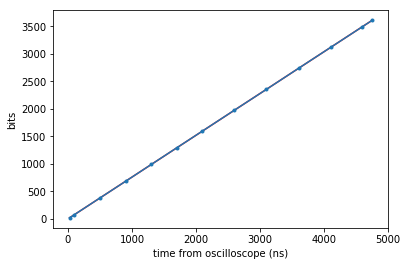

[ 0.77129337 -3.22969255]
[[ 1.40170882e-08 -3.17012584e-05]
 [-3.17012584e-05  1.07924756e-01]]


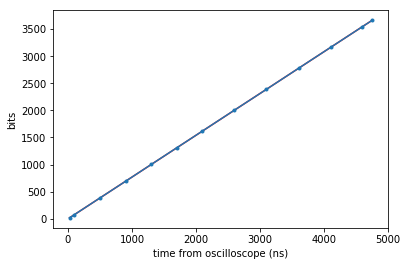

[0.75186771 1.14147306]
[[ 4.40593984e-07 -9.96454474e-04]
 [-9.96454474e-04  3.39241482e+00]]


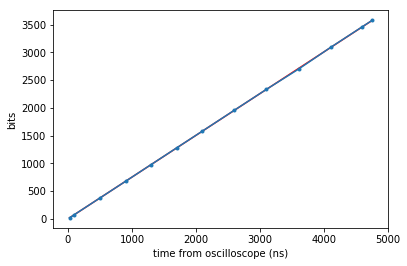

[0.76337288 1.00455541]
[[ 1.23012638e-08 -2.78207047e-05]
 [-2.78207047e-05  9.47143259e-02]]


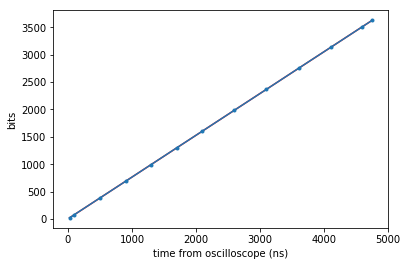

[0.74335873 3.25995472]
[[ 1.27517212e-08 -2.88395055e-05]
 [-2.88395055e-05  9.81825344e-02]]


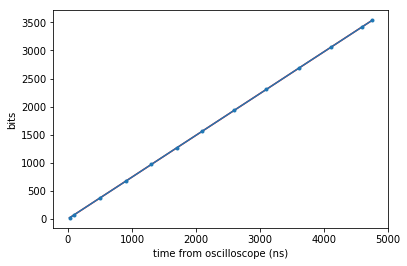

[0.72392664 2.46764134]
[[ 1.36477395e-08 -3.08659310e-05]
 [-3.08659310e-05  1.05080965e-01]]


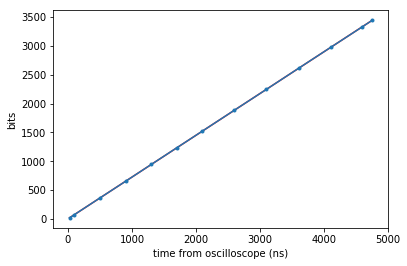

[0.73690023 3.41863822]
[[ 8.37274678e-09 -1.89359396e-05]
 [-1.89359396e-05  6.44666342e-02]]


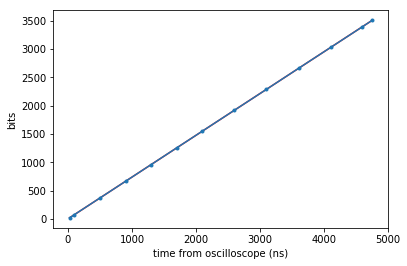

[0.7473839  3.30953254]
[[ 1.63461371e-08 -3.69686920e-05]
 [-3.69686920e-05  1.25857582e-01]]


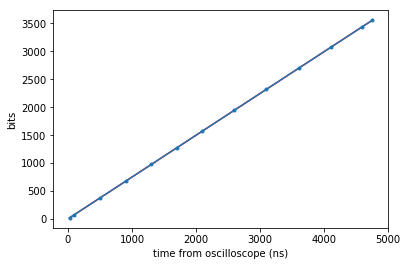

[  0.47654149 257.80386566]
[[ 1.57124102e-02 -3.55354283e+01]
 [-3.55354283e+01  1.20978244e+05]]


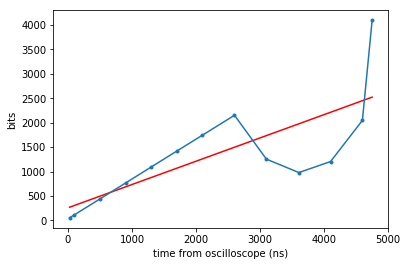

[ 0.90867926 67.23451682]
[[ 6.45438069e-04 -1.45973266e+00]
 [-1.45973266e+00  4.96957170e+03]]


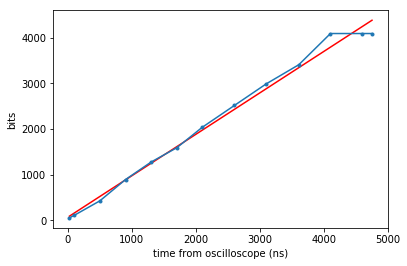

[ 0.82588169 -1.0910946 ]
[[ 1.41462210e-04 -3.19933054e-01]
 [-3.19933054e-01  1.08919261e+03]]


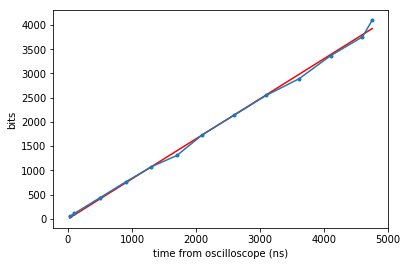

[ 0.7752195 35.0033344]
[[ 5.78908957e-04 -1.30926944e+00]
 [-1.30926944e+00  4.45733035e+03]]


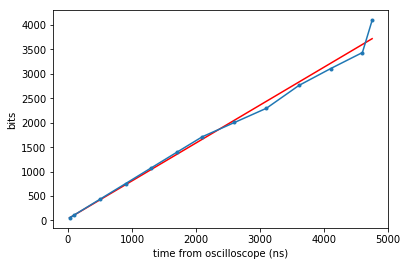

[0.78911047 9.6101495 ]
[[ 5.47984529e-08 -1.23933008e-04]
 [-1.23933008e-04  4.21921916e-01]]


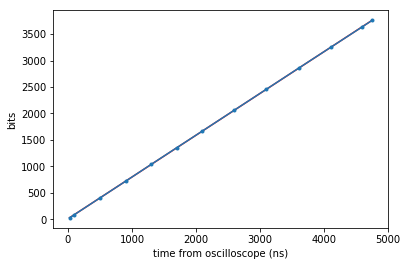

[ 0.81453668 -6.26889289]
[[ 1.93496909e-04 -4.37615648e-01]
 [-4.37615648e-01  1.48983688e+03]]


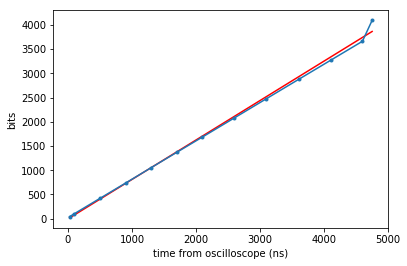

[0.85406605 1.88375174]
[[ 1.26895940e-04 -2.86989915e-01]
 [-2.86989915e-01  9.77037950e+02]]


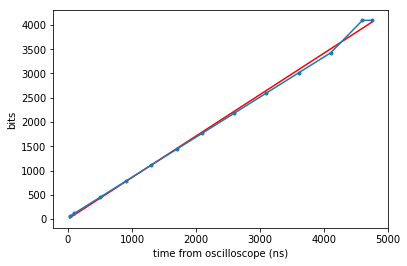

[-2.18114415e-12  4.09500000e+03]
[[inf inf]
 [inf inf]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


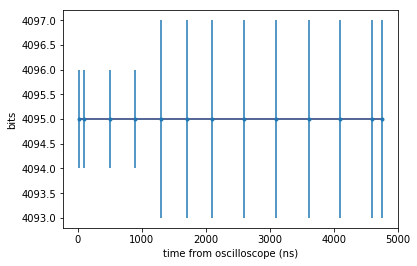

[array([0.75945373, 0.85228061]), array([ 0.77129337, -3.22969255]), array([0.75186771, 1.14147306]), array([0.76337288, 1.00455541]), array([0.74335873, 3.25995472]), array([0.72392664, 2.46764134]), array([0.73690023, 3.41863822]), array([0.7473839 , 3.30953254]), array([  0.47654149, 257.80386566]), array([ 0.90867926, 67.23451682]), array([ 0.82588169, -1.0910946 ]), array([ 0.7752195, 35.0033344]), array([0.78911047, 9.6101495 ]), array([ 0.81453668, -6.26889289]), array([0.85406605, 1.88375174]), array([-2.18114415e-12,  4.09500000e+03])]


In [23]:
def linear (x, a, b):
    return a*x+b

time=[]
t_errors=[1,1,1,1,2,2,2,2,2,2,2,2,2]
bit_errors=[]
for i in range (1,14):
    bit_errors.append(math.sqrt(200))
parameters=[]

for count_ti in range(1,14):
    time.append(time_values['t%i'%(count_ti)])
for count_ch in range(1,17):
    time_bit=[]
    fitted=[]
    for count_ti in range(1,14):
        time_bit.append(tdc_averages['channel%i'%(count_ch)]['tbit%i'%(count_ti)])
    popt, pcov = curve_fit(linear, time, time_bit)
    print(popt)
    print(pcov)
    parameters.append(popt)
    plt.ylabel("bits")
    plt.xlabel("time from oscilloscope (ns)")
    plt.errorbar(time, time_bit, t_errors, bit_errors, marker='.')
    for element in time:
        fitted.append(linear(element,*popt))
    plt.plot(time, fitted, 'r-')
    plt.show()
    
print(parameters)    

    
    
    

In [37]:
par_df=pd.DataFrame(parameters, columns=['a','b'])
#tdc_names=['tdc11','tdc12','tdc13','tdc14','tdc15','tdc16','tdc17','tdc18','tdc21','tdc22','tdc23','tdc24','tdc25','tdc26','tdc27','tdc28']
for count_out in range(1,3):
    for count_in in range(1,9):
        names.append('t%i%i'%i(count_out,count_in))

tdc_names_df=pd.DataFrame(tdc_names, columns=['tdc'])



TypeError: 'int' object is not callable

In [33]:
tdc_names_df

,tdc
0,tdc11
1,tdc12
2,tdc13
3,tdc14
4,tdc15
5,tdc16
6,tdc17
7,tdc18
8,tdc21
9,tdc22


In [36]:
merged_df=pd.concat([tdc_names_df['tdc'],'par_df'],axis=1)

TypeError: cannot concatenate object of type "<class 'str'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid